# 

# Mini Project III - Twitter US Airline Sentiment Analysis

## What is Sentiment Analysis
Sentiment Analysis is a process of identifying opinions and provide a quantifiable results using AI and Natural Language Processing techniques to process raw data. In today's world social media such as Twitter, Facebook and many other services have become the place where people share their opinions.

Advantages of Sentiment Analysis:

- Capture people’s opinion expressed in natural language.
- Provides a quantifiable method to report results.
- Useful tool for business to understand their customers. 


## What is Twitter?
“Twitter is an American microblogging and social networking service on which users post and interact with messages known as "tweets". Registered users can post, like, and retweet tweets, but unregistered users can only read them”. 
Source: https://en.wikipedia.org/wiki/Twitter


## Problem Definition
The objective is to predict whether a tweet contains positive, negative, or neutral sentiment about the airline based on customer opinion among six US airlines.

## Business Question
Sentiment Analysis can help businesses and services to understand their customer’s experience and make necessary changes to improve the quality of their services.

Benefits of Sentiment Analysis for a Business:

- Understand customer’s experience.
- Identify customer complaints.
- Identify best products/services.
- Understand how competitors perform.
- Focus on what areas to be improved in the business.






## Dataset

This data originally came from Crowdflower's Data for Everyone library(based on Kaggle.com),downloaded from www.kaggle.com. This dataset contains 15000 rows and 15 features.

In the sample of 15000 sentiment, 63% are negative tweets,21% are neutral tweets, while the remaining 16% are positive. All tweets are distributed among six US airlines.
- United
- US Airways
- American
- Southwest
- Delta
- Virgin America
 
Target Variable : Airline Sentiment
Predict Variable : Tweet text


### Import libraries

In [1]:
## Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import string
import spacy
import regex as re
from wordcloud import WordCloud, STOPWORDS

from collections import Counter

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# import warnings
# warnings.filterwarnings('ignore')

%matplotlib inline

#### Load data

In [2]:
## Loading the data
df = pd.read_csv('./Data/Tweets.csv')
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## EDA

#### Inspect the data

- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
  
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)


In [3]:
df.shape

(14640, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

###### Check for **Null** values 

In [5]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

###### Drop Columns with more than 50% null values and unrelateed features for sentiment analysis

In [6]:
df_tweet=df.drop(['tweet_id' ,'airline_sentiment_confidence','negativereason_confidence','name','airline_sentiment_gold', 'negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'], axis = 1)

In [7]:
df_tweet.head()

,airline_sentiment,negativereason,airline,text
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...


###### Check for **Zero** values 

In [7]:
df_tweet.isin([0]).sum()

airline_sentiment    0
negativereason       0
airline              0
text                 0
dtype: int64

###### check for value counts in each column

In [8]:
df_tweet['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [9]:
df_tweet['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [10]:
df_tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

### Data Visualization

###### Airline Sentiment

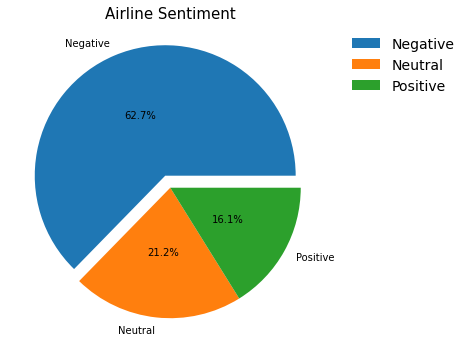

In [11]:
att=df_tweet.groupby("airline_sentiment")['airline_sentiment'].count()
pie, ax = plt.subplots(figsize=[10,6])
labels = 'Negative','Neutral','Positive'
my_explode = (0.1, 0,0)
plt.pie(x=att, autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Airline Sentiment", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1),fontsize=14)

In [13]:
# Based on above chart we can see that 62.7% are negative sentiment, 21.2% are neutral sentiment and 16.1% are positive sentiment.

###### Sentiment Distribution Among Air Line

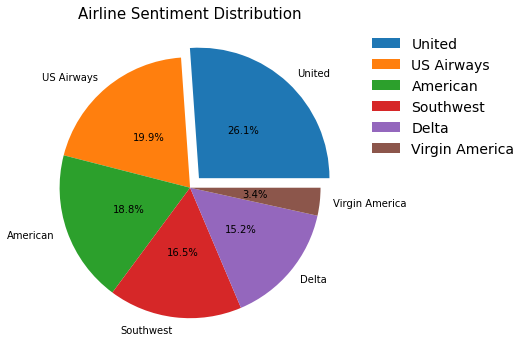

In [12]:
pie, ax = plt.subplots(figsize=[10,6])
labels = 'United','US Airways','American','Southwest','Delta','Virgin America'
my_explode = (0.1, 0,0,0,0,0)
plt.pie(x=df_tweet.airline.value_counts(), autopct="%.1f%%",labels=labels, explode=my_explode, pctdistance=0.5)
plt.title("Airline Sentiment Distribution", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1),fontsize=14)
plt.show()

In [ ]:
# United airline has the highest tweets while Virgin Amenrica has the lowest tweets.

###### Sentiment vs Airline

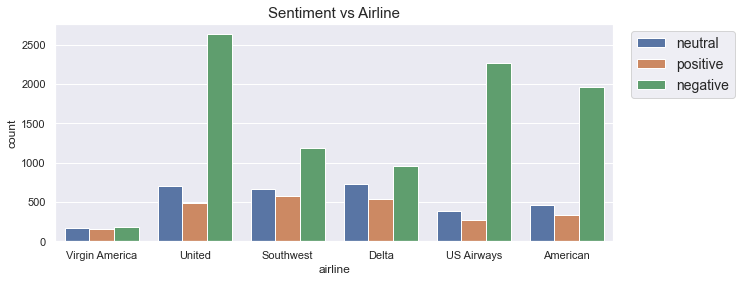

In [13]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10, 4))
sns.countplot(x="airline",hue="airline_sentiment", data=df_tweet).set_title("Sentiment vs Airline",fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
plt.show()

In [ ]:
# United Airline has the highest negative sentiment among other airlines.

###### Airline vs Sentiment

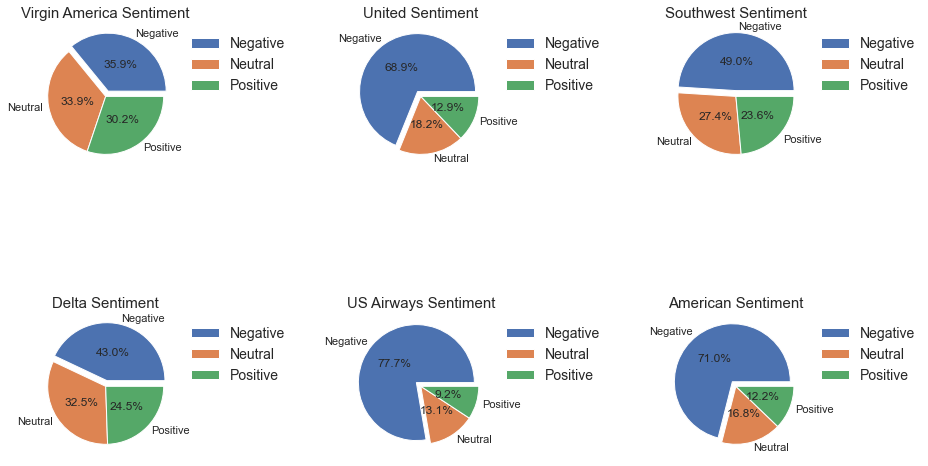

In [14]:
Virgin_A= df_tweet[df_tweet.airline =='Virgin America']
plt.figure(figsize = (16, 8))
plt.subplots_adjust(wspace=0.2, hspace=1)

plt.subplot(231)
ax = plt.gca()
labels = 'Negative','Neutral','Positive'
my_explode = (0.1, 0,0)
plt.pie(x=Virgin_A.groupby("airline_sentiment")['airline_sentiment'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Virgin America Sentiment", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

United= df_tweet[df_tweet.airline =='United']
plt.subplot(232)
ax = plt.gca()
plt.pie(x=United.groupby("airline_sentiment")['airline_sentiment'].count(), autopct="%.1f%%",explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("United Sentiment", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)


Southwest= df_tweet[df_tweet.airline =='Southwest']
plt.subplot(233)
ax = plt.gca()
plt.pie(x=Southwest.groupby("airline_sentiment")['airline_sentiment'].count(), autopct="%.1f%%",explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Southwest Sentiment", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

Delta= df_tweet[df_tweet.airline =='Delta']
plt.subplot(234)
ax = plt.gca()
plt.pie(x=Delta.groupby("airline_sentiment")['airline_sentiment'].count(), autopct="%.1f%%",explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Delta Sentiment", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

USAirways= df_tweet[df_tweet.airline =='US Airways']
plt.subplot(235)
ax = plt.gca()
plt.pie(x=USAirways.groupby("airline_sentiment")['airline_sentiment'].count(), autopct="%.1f%%",explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("US Airways Sentiment", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

American= df_tweet[df_tweet.airline =='American']
plt.subplot(236)
ax = plt.gca()
plt.pie(x=American.groupby("airline_sentiment")['airline_sentiment'].count(), autopct="%.1f%%",explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("American Sentiment", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

In [ ]:
# Virgin America has the highest percentage(30%) of positive sentiment as well as lowest negative sentiment percentage(36%). Based on public opinion Virgin America perform the best out of all US  airlines followed by Delta airline

###### Reasons for Negative Sentiment

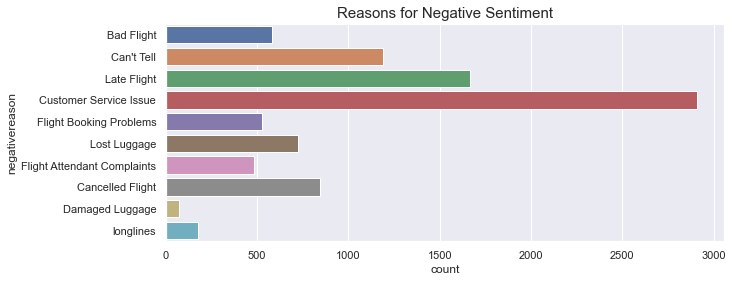

In [15]:
# df_tweet.negativereason.value_counts().plot(kind='bar', figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10, 4))
ax = sns.countplot(y="negativereason", data=df_tweet).set_title("Reasons for Negative Sentiment",fontsize=15)
plt.show()

In [51]:
# Main reason for negative sentiment is related to customer service and late Flight.

###### Reasons for Negative Sentiment vs Air Line

[]

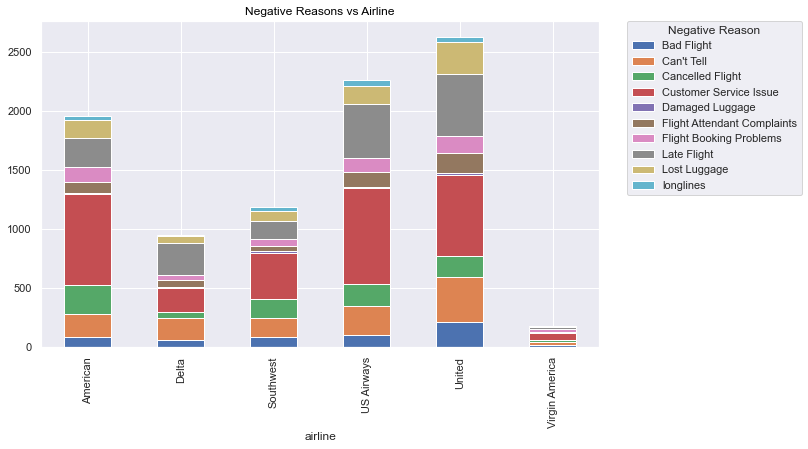

In [16]:
crosstab_df = pd.crosstab(df_tweet['airline'], df_tweet['negativereason'])

ax = crosstab_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Negative Reason')
ax.set_title("Negative Reasons vs Airline", color='black')
ax.plot()

In [ ]:
# Customer service issues are the most common negative reason among all airlines.
# US airlines and United airlines have relatively high negative sentiment due to late flights.
# United has the heist negative sentiment due to lost luggage

###### Word cloud Analysis

In [17]:
# Select Data for Sentiment Analysis
df_tweet['airline_sentiment'] = df_tweet['airline_sentiment'].replace(['negative','neutral','positive'],[-1,0,1])                

In [18]:
df_tw=df_tweet.drop(['negativereason'], axis = 1)

In [19]:
# ANSWER
df_tw.head()

,airline_sentiment,airline,text
0,0,Virgin America,@VirginAmerica What @dhepburn said.
1,1,Virgin America,@VirginAmerica plus you've added commercials t...
2,0,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,-1,Virgin America,@VirginAmerica it's really aggressive to blast...
4,-1,Virgin America,@VirginAmerica and it's a really big bad thing...


In [20]:
df_tw.tail()

,airline_sentiment,airline,text
14635,1,American,@AmericanAir thank you we got on a different f...
14636,-1,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,0,American,@AmericanAir Please bring American Airlines to...
14638,-1,American,"@AmericanAir you have my money, you change my ..."
14639,0,American,@AmericanAir we have 8 ppl so we need 2 know h...


In [21]:
df_tw.isnull().sum()

airline_sentiment    0
airline              0
text                 0
dtype: int64

In [22]:
df_tw.shape

(14640, 3)

###### Data Cleaning for Analysis

In [23]:
def clean_text(text):
    # reduce multiple spaces and newlines to only one
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
    # remove double quotes
    text = re.sub(r'"', '', text)
    # remove @username 
    text = re.sub(r'@[\w]*','',text)
    # remove special characters, numbers, punctuations
    text = re.sub(r'[^a-zA-Z#]', ' ', text)

    return text

In [24]:
# Clean Data
df_tw['text'] = df_tw['text'].apply(clean_text)

In [25]:
df_tw['text'] 

0                                              What  said 
1         plus you ve added commercials to the experien...
2         I didn t today    Must mean I need to take an...
3         it s really aggressive to blast obnoxious ent...
4                 and it s a really big bad thing about it
                               ...                        
14635     thank you we got on a different flight to Chi...
14636     leaving over    minutes Late Flight  No warni...
14637      Please bring American Airlines to #BlackBerry  
14638     you have my money  you change my flight  and ...
14639     we have   ppl so we need   know how many seat...
Name: text, Length: 14640, dtype: object

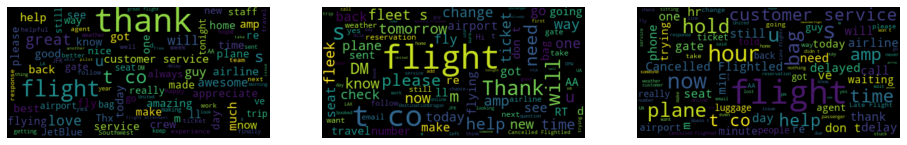

In [26]:
# Draw Word Cloud for Positive
positive=df_tw[df_tw['airline_sentiment'] == 1]
positive['text']
text = " ".join(review for review in positive.text)

plt.figure(figsize = (16, 8))
sns.set_theme(style="darkgrid")
plt.subplots_adjust(wspace=0.2, hspace=1)

plt.subplot(131)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for Neutral
neutral=df_tw[df_tw['airline_sentiment'] == 0]
neutral['text']
text = " ".join(review for review in neutral.text)
plt.subplot(132)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for Negative
negative=df_tw[df_tw['airline_sentiment'] == -1]
negative['text']
text = " ".join(review for review in negative.text)
plt.subplot(133)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
# fig -1 has positive words such as thank, love, good, happy
# fig - 2 has mix of positive and negative
# fig - 3 has negative words such as delay, bag, hold, customer service, waiting

###### Wordcloud for Virgin America

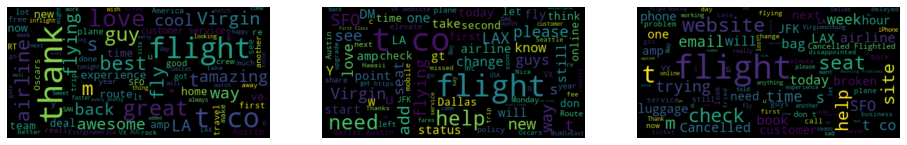

In [37]:
# Draw Word Cloud for Positive
positive=df_tw[(df_tw['airline_sentiment'] == 1) & (df_tw['airline'] =='Virgin America')]
positive['text']
text = " ".join(review for review in positive.text)

plt.figure(figsize = (16, 8))
sns.set_theme(style="darkgrid")
plt.subplots_adjust(wspace=0.2, hspace=1)

plt.subplot(131)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for Neutral
neutral=df_tw[(df_tw['airline_sentiment'] == 0 )& (df_tw['airline'] =='Virgin America')]
neutral['text']
text = " ".join(review for review in neutral.text)
plt.subplot(132)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for Neative
negative=df_tw[(df_tw['airline_sentiment'] == -1) & (df_tw['airline'] =='Virgin America')]
negative['text']
text = " ".join(review for review in negative.text)
plt.subplot(133)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
# fig -1 has positive words such as thank, best, great, awesome
# fig - 2 has mix of positive and negative such as love, help,status
# fig - 3 has negative words such as cancelled, disapointed, luggage

###### Wordcloud for United Airline

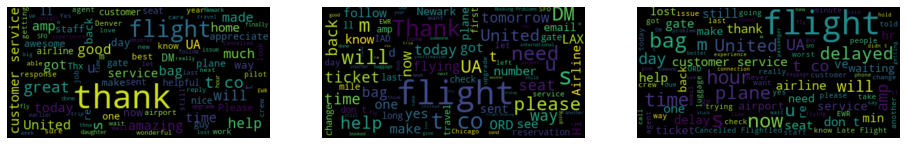

In [38]:
# Draw Word Cloud for Positive
positive=df_tw[(df_tw['airline_sentiment'] == 1) & (df_tw['airline'] =='United')]
positive['text']
text = " ".join(review for review in positive.text)

plt.figure(figsize = (16, 8))
sns.set_theme(style="darkgrid")
plt.subplots_adjust(wspace=0.2, hspace=1)

plt.subplot(131)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for Neutral
neutral=df_tw[(df_tw['airline_sentiment'] == 0 )& (df_tw['airline'] =='United')]
neutral['text']
text = " ".join(review for review in neutral.text)
plt.subplot(132)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for Negative
negative=df_tw[(df_tw['airline_sentiment'] == -1) & (df_tw['airline'] =='United')]
negative['text']
text = " ".join(review for review in negative.text)
plt.subplot(133)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
# fig -1 has positive words such as thank, good, service, customer service,best
# fig - 2 has mix of positive and negative such as flight,thank,bag, united
# fig - 3 has negative words such as delayed,customer service, time, delay

###### Wordcloud for Southwest Airline

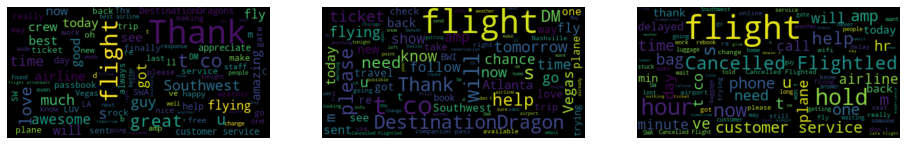

In [39]:
# Draw Word Cloud for Positive
positive=df_tw[(df_tw['airline_sentiment'] == 1) & (df_tw['airline'] =='Southwest')]
positive['text']
text = " ".join(review for review in positive.text)

plt.figure(figsize = (16, 8))
sns.set_theme(style="darkgrid")
plt.subplots_adjust(wspace=0.2, hspace=1)

plt.subplot(131)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for Neutral
neutral=df_tw[(df_tw['airline_sentiment'] == 0 )& (df_tw['airline'] =='Southwest')]
neutral['text']
text = " ".join(review for review in neutral.text)
plt.subplot(132)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for Negative
negative=df_tw[(df_tw['airline_sentiment'] == -1) & (df_tw['airline'] =='Southwest')]
negative['text']
text = " ".join(review for review in negative.text)
plt.subplot(133)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
# fig -1 has positive words such as thank, awesome,amazing,great
# fig - 2 has mix of positive and negative such as flight,thank,destination
# fig - 3 has negative words such as Flight, cancelled,hold,delayed

###### Wordcloud for Delta Airline

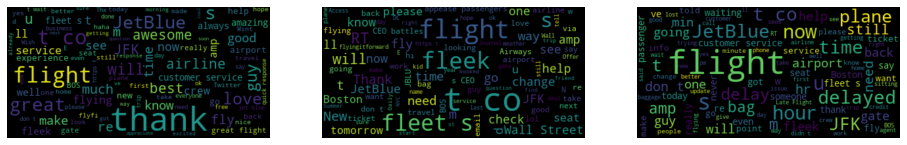

In [40]:
# Draw Word Cloud for Positive
positive=df_tw[(df_tw['airline_sentiment'] == 1) & (df_tw['airline'] =='Delta')]
positive['text']
text = " ".join(review for review in positive.text)

plt.figure(figsize = (16, 8))
sns.set_theme(style="darkgrid")
plt.subplots_adjust(wspace=0.2, hspace=1)

plt.subplot(131)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for Neutral
neutral=df_tw[(df_tw['airline_sentiment'] == 0 )& (df_tw['airline'] =='Delta')]
neutral['text']
text = " ".join(review for review in neutral.text)
plt.subplot(132)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for Negative
negative=df_tw[(df_tw['airline_sentiment'] == -1) & (df_tw['airline'] =='Delta')]
negative['text']
text = " ".join(review for review in negative.text)
plt.subplot(133)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
# fig -1 has positive words such as thank, awesome,amazing,great
# fig - 2 has mix of positive and negative such as fleet, flight,thank
# fig - 3 has negative words such as Flight, bag, customer service,time,delayed

###### Wordcloud for US Airways Airline

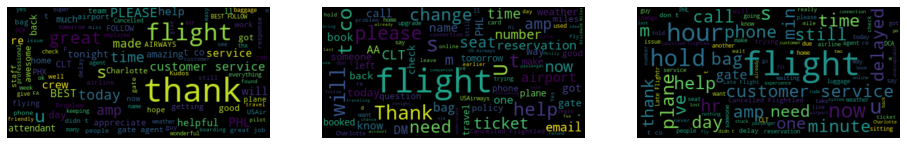

In [41]:
# Draw Word Cloud for Positive
positive=df_tw[(df_tw['airline_sentiment'] == 1) & (df_tw['airline'] =='US Airways')]
positive['text']
text = " ".join(review for review in positive.text)

plt.figure(figsize = (16, 8))
sns.set_theme(style="darkgrid")
plt.subplots_adjust(wspace=0.2, hspace=1)

plt.subplot(131)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for Neutral
neutral=df_tw[(df_tw['airline_sentiment'] == 0 )& (df_tw['airline'] =='US Airways')]
neutral['text']
text = " ".join(review for review in neutral.text)
plt.subplot(132)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for Negative
negative=df_tw[(df_tw['airline_sentiment'] == -1) & (df_tw['airline'] =='US Airways')]
negative['text']
text = " ".join(review for review in negative.text)
plt.subplot(133)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
# fig -1 has positive words such as thank, awesome,amazing,great, customer service
# fig - 2 has mix of positive and negative such as pleasae, flight, thank, help
# fig - 3 has negative words such as Flight, bag, customer service,delayed

###### Wordcloud for American Airline

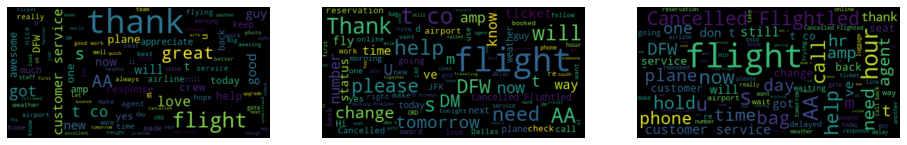

In [42]:
# Draw Word Cloud for Positive
positive=df_tw[(df_tw['airline_sentiment'] == 1) & (df_tw['airline'] =='American')]
positive['text']
text = " ".join(review for review in positive.text)

plt.figure(figsize = (16, 8))
sns.set_theme(style="darkgrid")
plt.subplots_adjust(wspace=0.2, hspace=1)

plt.subplot(131)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for Neutral
neutral=df_tw[(df_tw['airline_sentiment'] == 0 )& (df_tw['airline'] =='American')]
neutral['text']
text = " ".join(review for review in neutral.text)
plt.subplot(132)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Draw Word Cloud for Negative
negative=df_tw[(df_tw['airline_sentiment'] == -1) & (df_tw['airline'] =='American')]
negative['text']
text = " ".join(review for review in negative.text)
plt.subplot(133)
ax = plt.gca()
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
# fig -1 has positive words such as thank, awesome,amazing,great, customer service
# fig - 2 has mix of positive and negative such as pleasae, flight, thank, help
# fig - 3 has negative words such as Flight, bag, customer service,delayed